Linear Regression:<br>
Y = wX + b


> Y = dependent variable<br>
> X = independent variable<br>
> w = weight and b = bias<br>

<b> Gradient descent </b>is the optimization algorithm and is used for minimizing the loss function.<br>
<p> w = w-a*dw </p>
<p> b = b-a*db </p>

<b> Learning rate </b> is the tuning parameter in the optimization algorithm.






# Import dependencies

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

Linear Regression

In [43]:
class Linear_Regression:

# initialize the parameters
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

#
  def fit(self, X, y):

    # write the number of training samples(m) and the number of features(n)
    # X.shape gives the number of rows and columns
    self.m, self.n = X.shape

    # initialize the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.y = y

    # implement the gradient descent
    for i in range(self.no_of_iterations):

      self.update_weights()

  def update_weights(self, ):

    y_pred = self.predict(self.X)

    # calculate the gradients
    # We took transpose of X to make 1 row having many colmns
    # so that we can multiply easily
    dw = - (2 * (self.X.T).dot(self.y - y_pred)) / self.m
    db = - (2 * np.sum(self.y - y_pred)) / self.m

    #update the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self, X):


    # Use the formula of linear regression
    return X.dot(self.w) + self.b



Use linear regression model for prediction<br>





Import the libraries

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Preprocessing

In [45]:
# load the data into pandas dataframe
salary_data = pd.read_csv(f"E:/ML Ops/Project Folder/ML Model Building from scratch/algorithm_dataset/salary_data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [46]:
# let us see the number of rows and columns in the data-set
salary_data.shape

(30, 2)

In [47]:
salary_data.isna()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [48]:
# to check columns having missing values
salary_data.isna().any()

YearsExperience    False
Salary             False
dtype: bool

In [49]:
# to check rows having missing values
salary_data.isna().any(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

Split the target and the feature

In [50]:
X = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,1].values

In [51]:
# Let us check the shape of X and y
print("Shape of X is " ,X.shape )
print("Shape of y is " , y.shape)


Shape of X is  (30, 1)
Shape of y is  (30,)


Split the data into training and testing set

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
print("Shape of X_train is ", X_train.shape)
print("Shape of y_train is ", y_train.shape)
print("Shape of X_test is ", X_test.shape)
print("Shape of y_test is ", y_test.shape)


Shape of X_train is  (24, 1)
Shape of y_train is  (24,)
Shape of X_test is  (6, 1)
Shape of y_test is  (6,)


Train the linear regression model

In [53]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 100)

In [54]:
model.fit(X_train, y_train)

In [55]:
# print the model parameter values ( weights and bias )
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  10797.455044383474
bias =  16058.805504204893


y = 10787(X) + 16058 <br>
salary = 10787(experience) + 16058

Predict the salary value for the test data

In [56]:
test_data_pred = model.predict(X_test)


In [57]:
print(test_data_pred)

[119714.37393029  68966.33522168 104597.93686815  73285.31723944
  50610.66164623  56009.38916842]


Visualize Predicted and actual values

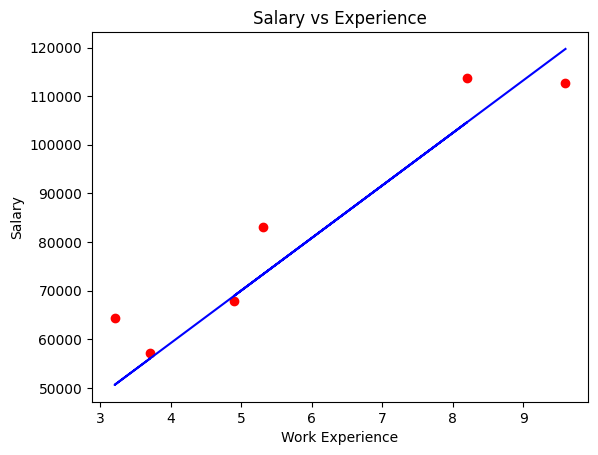

In [58]:
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_test, test_data_pred, color='b')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [59]:
from sklearn.metrics import r2_score
print("The r2 score of the model is ", r2_score(y_test, test_data_pred))

The r2 score of the model is  0.8613448409899407
